# 9. 트랜스포머로 만드는 대화형 챗봇
## 9-1. 들어가며

안녕하세요~!

오늘은 여러분의 생활 속에서도 많이 사용되고 있는 챗봇에 관련된 학습을 진행할 예정입니다.

**대화형 챗봇이란?**

인공지능이라고 할 때 처음 떠오르는 것은 무엇인가요? 인간의 언어를 이해하고 인간과 자연어로 대화할 수 있는 기계를 우리는 자연스럽게 떠올리게 됩니다. 이미 시리나 구글 어시스턴트 등을 사용하는 것이 어색하지 않게 되었지요. 하지만 우리가 주변에서 흔히 볼 수 있는 챗봇은 모두 대화형인 것은 아닙니다.

- 챗봇의 5가지 대표 유형(https://tonyaround.com/챗봇-기획-단계-챗봇의-5가지-대표-유형-종류/)

위 참고 자료를 읽어보면, 챗봇에는 인간과 자연어로 대화를 주고받는 대화형 챗봇 이외에도, 정해진 트리형 메뉴 구조를 따라가는 트리형(버튼) 챗봇, 추천형 챗봇, 시나리오형 챗봇이 있고, 이들을 결합한 결합형 챗봇이 있다고 합니다. 대화형을 제외하면 사실상 챗봇은 대화형 UX를 가졌지만 본질적으로는 검색엔진이거나, 혹은 음성 ARS를 대화형 UX에 옮겨놓은 것이라 할 수 있습니다.

하지만 대화형 챗봇이 아니라면 챗봇이 가지는 한계는 명확합니다. 규칙 기반으로 구현된 챗봇은 사전에 정해진 말만 알아듣고 반응할 수 있는데, 진정한 챗봇의 가치는 사용자가 어떤 말을 하더라도 알아듣고 적절히 대응할 수 있는 자유도에 있기 때문입니다. 딥러닝을 통한 자연어처리 기술이 새로운 가능성을 보여주자, 사람들은 챗봇이 가져올 혁명적인 변화에 새삼 기대감을 가지기 시작했습니다.

챗봇과 딥러닝

하지만 우리 주변에서 볼 수 있는 챗봇이 그다지 스마트하다는 느낌을 주지 않는 것은 왜일까요? 챗봇은 어떻게 발전해 온 것일까요?

- 챗봇 역사의 모든 것(https://revenuefy.io/ko/cx/history-of-ai-charbot)

위 참고 자료를 읽어보면, 챗봇에 대한 초창기의 기대, 한계점, 최근 BERT 등의 pretrained model의 발전 이후의 새로운 기대감으로 이어지는 챗봇의 간략한 역사를 확인해 볼 수 있습니다. 인간보다 정확하게 퀴즈를 풀어내는 BERT, ALBERT 등은 모두 트랜스포머(Transformer)라는 모델을 활용하여 pretrain을 적용한 것들입니다. 트랜스포머 이전에도 LSTM 등 RNN 기반의 딥러닝 모델, 그리고 이를 인코더-디코더 구조로 엮은 seq2seq 모델 등을 활용하여 챗봇 제작을 시도해 왔습니다. 그러나 2017년에 발표된 트랜스포머는 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리 속도를 보이면서도 LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는 데 유리하다는 좋은 특징을 보여주었고, 이후 자연어처리 분야의 혁신을 가져온 발판이 되어 주었습니다.

그래서 오늘은 트랜스포머 모델을 기반으로 한 인코더-디코더 구조를 바탕으로 챗봇을 제작해 보려고 합니다. 이미 인코더-디코더 구조에 대해서는 seq2seq, AutoEncoder, GAN 등에서 여러 번 경험해 보셨을 것입니다. seq2seq 모델을 기반으로 하는 번역기를 생각해 봅시다. 영어를 한국어로 번역하는 모델은 영어 문장을 인코더로 해석하여 나온 벡터를 디코더의 인풋(input)으로 삼아 디코더에서 한국어 문장을 생성하게 합니다. 그런 것처럼 사용자의 입력 문장을 인코더로 해석하고, 적절한 답변 문장을 디코더가 생성하도록 구성할 수 있을 것입니다.

물론 더욱 좋은 성능을 내기 위해서는 엄청나게 많은 코퍼스로 학습시킨 pretrained model을 활용하는 것이 필요합니다. 오늘 우리가 다룰 데이터의 규모로 충분히 스마트한 챗봇을 만들기는 어려울 것입니다. 그러나 그런 챗봇을 만들 수 있는 모델의 기본 구조를 알아보는 데는 충분히 도움이 될 것입니다.

### 학습 내용
---
1. 트랜스포머와 인코더 디코더
- 트랜스포머에서 사용되는 인코더와 디코더를 알아보고, 전체적인 구조를 파악합니다.
2. 트랜스포머의 입력 이해하기
- 트랜스포머의 입력 방식을 알아보고, PositionalEncoding Layer의 코드를 학습합니다.
3. 어텐션? 어텐션!
- 어텐션 메커니즘에 대해서 알아보고, 트랜스포머에서 사용되는 3가지 어텐션을 파악합니다.
4. 스케일드 닷 프로덕트 어텐션
- 스케일드 닷 프로덕트 어텐션을 알아보고, 함수 코드로 구현하며 학습합니다.
5. 머리가 여러 개인 어텐션
- 멀티 헤드 어텐션을 알아보고, 코드로 구현하며 학습합니다.
6. 마스킹
- 트랜스포머에서 사용하는 2가지 마스킹(Padding Masking, Look ahead Masking)에 대해서 알아보고, 코드를 통해 어떻게 사용되는지 학습합니다.
7. 인코더
- 인코더를 설계하고, 코드로 구현해보며 학습합니다.
8. 디코더
- 디코더를 설계하고, 코드로 구현해보며 학습합니다.
9. 챗봇의 병렬 데이터 받아오기
- 학습에 사용할 데이터셋을 준비하는 과정을 수행합니다.
10. 병렬 데이터 전처리하기
- 준비된 데이터를 학습시키기 위해 전처리과정을 수행하며, 교사 강요에 대해서 학습니다.
11. 모델 정의 및 학습하기
- 트랜스포머 모델을 정의하고 훈련까지 수행합니다.
12. 챗봇 테스트하기
- 학습된 트랜스포머를 사용하여 테스트를 진행합니다.

### 학습 목표
---
- 트랜스포머의 인코더 디코더 구조 이해할 수 있습니다.
- 내부 단어 토크나이저 사용할 수 있습니다.
- 셀프 어텐션 이해할 수 있습니다.
- 한국어에도 적용할 수 있습니다.

### 준비물
---
터미널을 열어 실습에 필요한 디렉토리를 생성합니다.

> mkdir -p ~/aiffel/songys_chatbot

## 9-2. 트랜스포머 구조 살펴보기

앞서 소개했듯, 오늘 여러분들이 실습해보실 모델은 ‘트랜스포머’입니다. 2017년에 발표된 트랜스포머는 자연어 처리 분야를 넘어 이미지 인식 분야에도 큰 영향을 끼쳤으며, 2024년 초까지도 ChatGPT-3, SORA 등 다양한 분야에서 SOTA 모델들이 이 구조를 차용하고 있습니다. 그만큼 많이 중요한 모델이니, 학습 내용을 잘 따라오시기 바랄게요!

---
트랜스포머는 RNN, LSTM 등을 거치며 기존의 복잡해지는 순환 층이나 합성곱 층을 전부 제외하고, 어텐션 매커니즘만으로 구성된 모델입니다.
뒤쪽에서 모델 구조의 각 부분을 자세히 설명하기 전에, 전체 구조를 먼저 살펴보고 넘어가겠습니다.

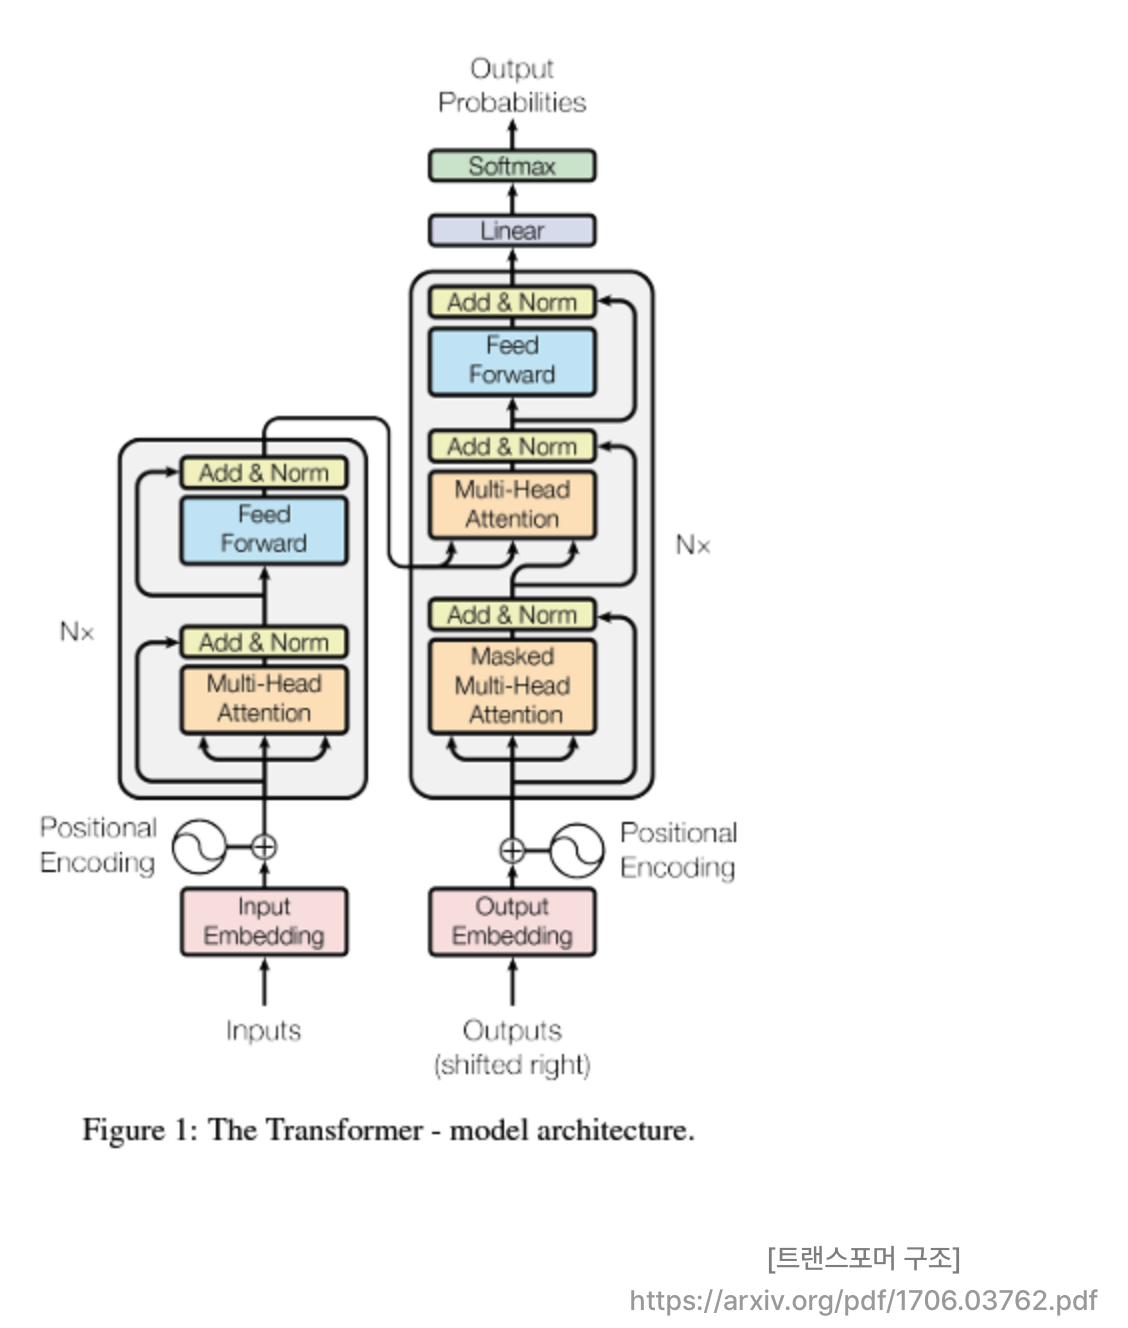

트랜스포머는 크게 보면 인코더 층(Encoder layer, 왼쪽) 과 디코더 층(Decoder layer, 오른쪽)으로 나뉘어져 있습니다.
각 블록은 N개씩 반복 배치됩니다. 쉽게 이야기하자면, 인코더 층 N개가 이어져있고, 디코더 층 N개가 이어집니다.

인코더 층에는 2개의 서브 레이어가 있습니다.<왼쪽 부분> 멀티헤드 셀프 어텐션 (혹은 인코더 셀프 어텐션)과 피드포워드 신경망으로 구성되어있는데요, 이 둘을 N번을 반복 통과한 후, 디코더 층으로 계산 결과를 보내게 됩니다.

한편, 디코더 층에는 3개의 서브레이어가 있습니다.<오른쪽 부분> 마스크드 멀티헤드 셀프 어텐션 (혹은 디코더 셀프 어텐션), 멀티헤드 어텐션 (혹은 인코더-디코더 셀프 어텐션)과 피드포워드 신경망입니다. 마찬가지로 N번 반복 통과한 후, 계산 결과를 출력해내게 됩니다.

마지막으로, 인코더 층/디코더 층에 임베딩 출력을 입력하기 전에 포지셔널 인코딩을 합치게 됩니다. <아래 부분>
어텐션 내부에서는 어떤 일들이 일어나는지, 각 어텐션들이 어떻게 다른지, 그리고 왜 포지셔널 인코딩을 합치는지에 대해서는 이어서 설명하도록 하겠습니다.

---

트랜스포머는 워낙 유명한 모델이 되어, 많은 사람들이 공부하다보니 여러 용어들이 혼용되기도 합니다. 헷갈리지 않도록 유의하면서 자세히 살펴보도록 하죠!

## 9-3. 트랜스포머와 인코더 디코더

### 인코더와 디코더 구조 되짚어보기
---
번역기를 만드는 데 사용한 대표적인 모델인 인코더와 디코더 구조를 되짚어 봅시다.

번역기는 인코더와 디코더 두 가지 아키텍처로 구성돼 있었습니다. 인코더에 입력 문장이 들어가고, 디코더는 이에 상응하는 출력 문장을 생성합니다. 그리고 이를 훈련한다는 것은 결국 입력 문장과 출력 문장 두 가지 병렬 구조로 구성된 데이터셋을 훈련한다는 의미였습니다.

훈련 데이터셋의 구성(번역)

- 입력 문장 : '저는 학생입니다.'
- 출력 문장 : 'I am a student'

이런 병렬적으로 구성된 데이터셋을 인코더와 디코더로 학습하는 경우는 사실 번역기에만 한정되지는 않습니다. 질문에 대해서 대답을 하도록 구성된 데이터셋을 인코더와 디코더 구조로 학습한다면, 주어진 질문에 답변할 수 있는 챗봇 또한 만들 수 있을 테니까요.

훈련 데이터셋의 구성(질문-답변)

입력 문장 : '오늘의 날씨는 어때?'
출력 문장 : '오늘은 매우 화창한 날씨야'

### 트랜스포머의 인코더와 디코더
---
트랜스포머 또한 번역기와 마찬가지로 기본적으로 인코더와 디코더 구성을 가지고 있습니다. 입력 문장을 넣으면 출력 문장을 내뱉고 있지요.

위의 블랙박스로 가려져 있는 트랜스포머의 내부 구조를 열어보면 아래와 같습니다!

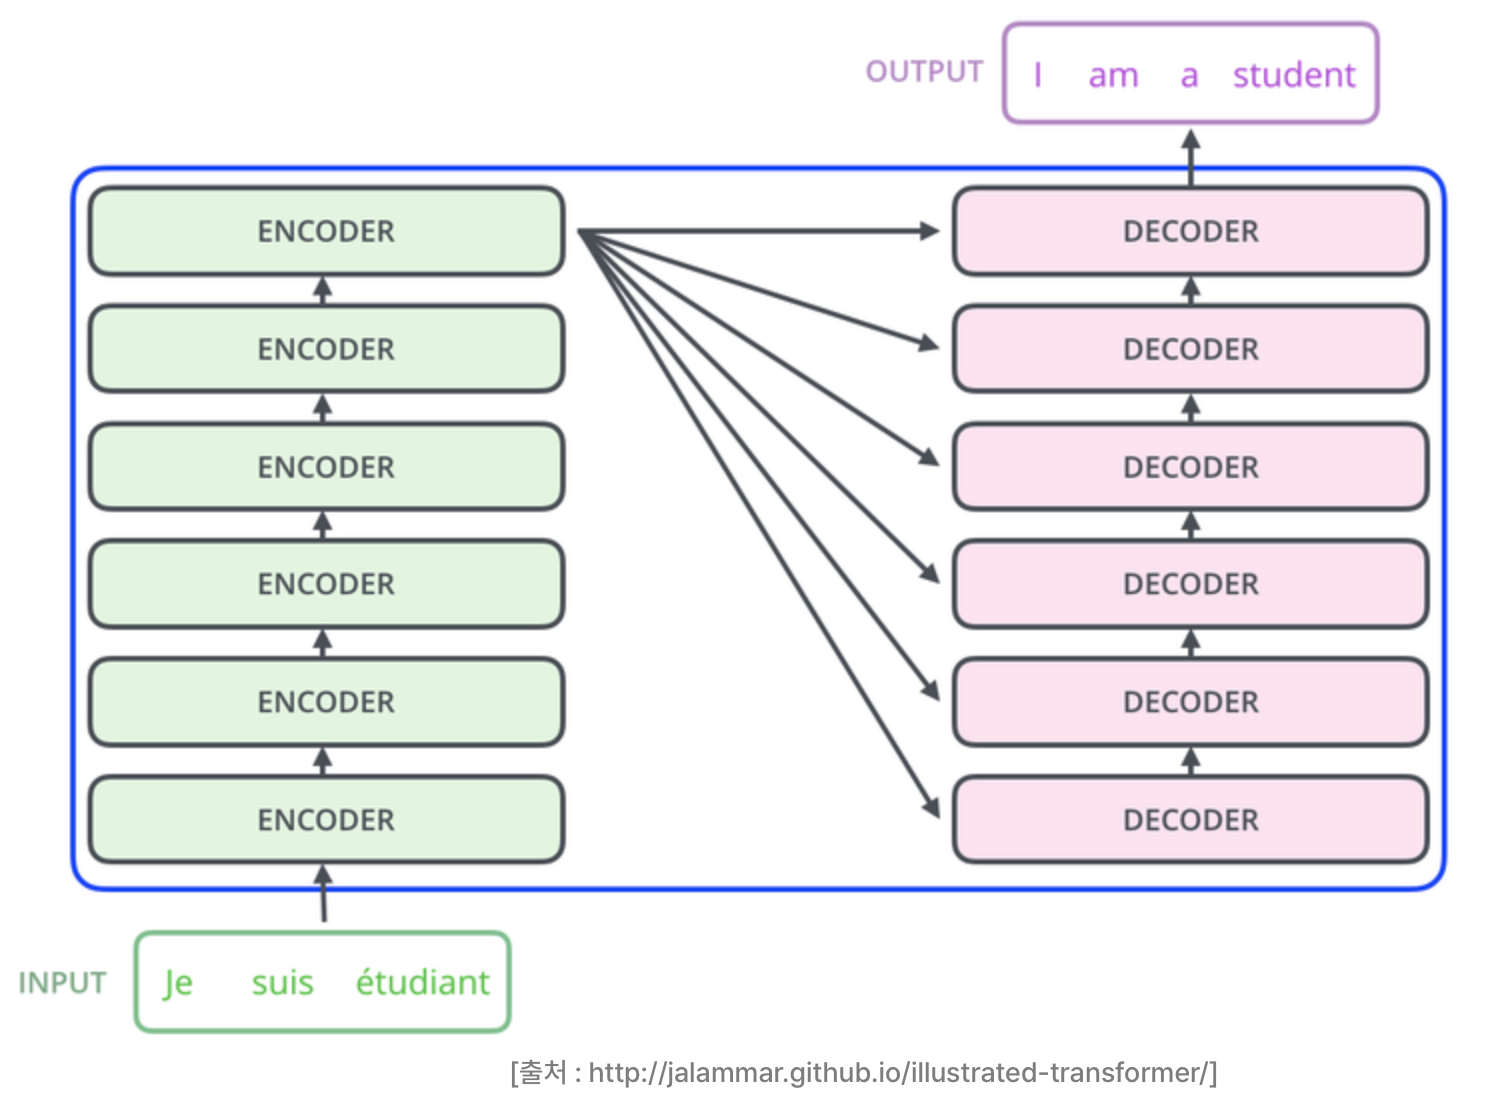

초록색 색깔의 도형을 인코더 층(Encoder layer), 핑크색 색깔의 도형을 디코더(Decoder layer)라고 하였을 때, 입력 문장은 누적해 쌓아 올린 인코더의 층을 통해서 정보를 뽑아내고, 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조를 갖고 있어요.

그리고 그 내부를 조금 더 확대해 보면 아래와 같이 톱니바퀴처럼 맞물려 돌아가는 여러 가지 부품들로 구성돼 있습니다.

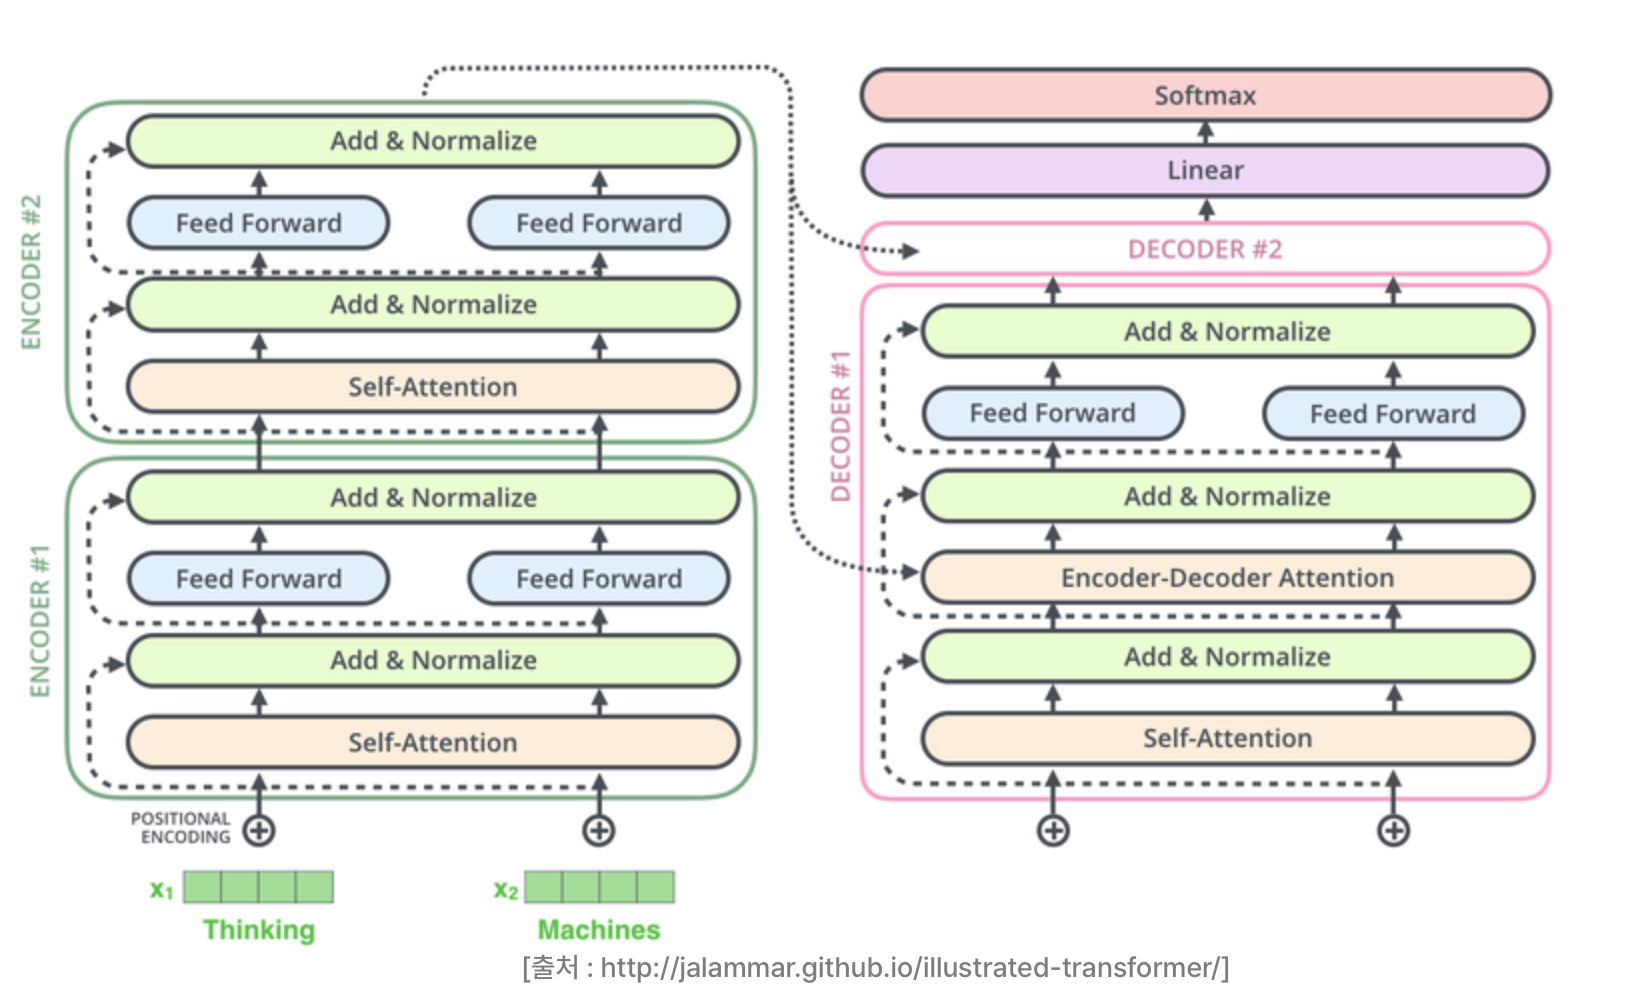

위의 그림에서 적힌 모듈들을 하나씩 정리해 볼까요?


## 9-4. 트랜스포머의 입력 이해하기

먼저 앞으로 진행하면서 필요한 패키지를 임포트하겠습니다!

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


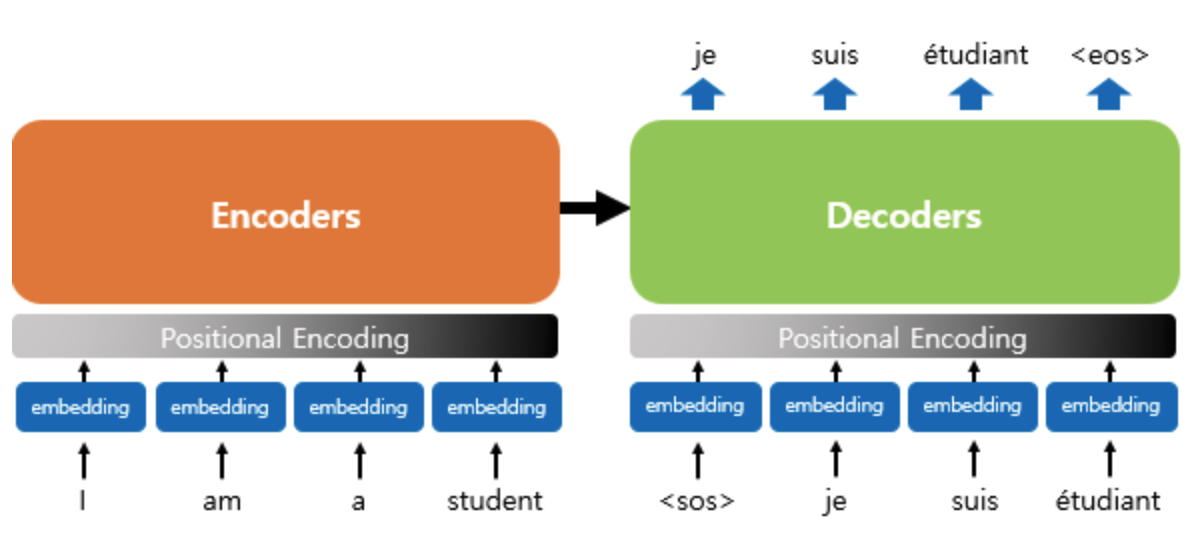

많은 자연어 처리 모델들은 텍스트 문장을 입력으로 받기 위해 단어를 임베딩 벡터로 변환하는 벡터화 과정을 거칩니다. 트랜스포머 또한 그 점에서는 다른 모델들과 다르지 않습니다. 하지만 트랜스포머 모델의 입력 데이터 처리에는 RNN 계열의 모델들과 다른 점이 한 가지 있습니다. 바로 임베딩 벡터에 어떤 값을 더해준 뒤에 입력으로 사용한다는 점입니다. 그 값은 바로 위 그림에서의 포지셔널 인코딩(positional Encoding)에 해당하는 부분입니다.

위 그림에서 인코더의 입력 부분을 조금 더 확대해 본다면 이런 그림이 나오겠죠?

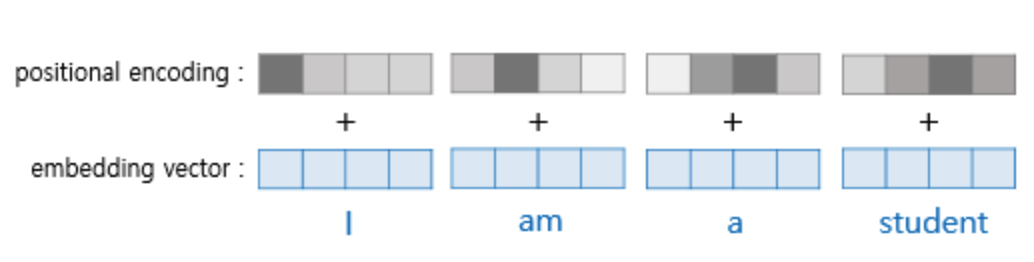

이렇게 해주는 이유는 트랜스포머는 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받기 때문입니다. 트랜스포머가 RNN과 결정적으로 다른 점이 바로 이 부분입니다. RNN에는 어차피 문장을 구성하는 단어들이 어순대로 모델에 입력되므로, 모델에게 따로 어순 정보를 알려줄 필요가 없었습니다. 그러나 문장에 있는 모든 단어를 한꺼번에 문장 단위로 입력받는 트랜스포머는 자칫 'I ate lunch'와 'lunch ate I'를 구분할 수 없을지도 모릅니다. 그래서 같은 단어라도 그 단어가 문장의 몇 번째 어순으로 입력되었는지를 모델에 추가로 알려 주기 위해, 단어의 임베딩 벡터에다가 위치 정보를 가진 벡터(Positional Encoding) 값을 더해서 모델의 입력으로 삼는 것이지요!

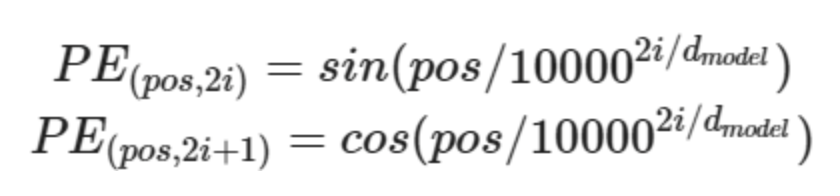

포지셔널 인코딩의 벡터값은 위의 수식에 의해서 정해집니다. 사인 함수와 코사인 함수의 그래프를 상기해보면 요동치는 값의 형태를 생각해 볼 수 있는데, 트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더하여 줍니다.

위의 두 함수에는 pos,i,dmodel 등 생소한 변수들이 있습니다. 위의 함수를 이해하기 위해서는 위에서 본 임베딩 벡터와 포지셔널 인코딩의 덧셈은 사실 임베딩 벡터가 모여 만들어진 문장 벡터 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어진다는 점을 이해해야 합니다.

dmodel은 임베딩 벡터의 차원을 의미하고 있고, pos는 입력 문장에서의 임베딩 벡터의 위치를 나타내며, i는 임베딩 벡터 내의 차원의 인덱스를 의미합니다. 이렇게 임베딩 행렬과 포지셔널 행렬이라는 두 행렬을 더함으로써 각 단어 벡터에 위치 정보를 더해주게 되는 것이죠!

In [2]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


행의 크기가 50, 열의 크기가 512인 행렬을 그려봅시다. 이를테면, 최대 문장의 길이가 50이고 워드 임베딩 차원을 512로 하는 모델의 입력 벡터 모양이 이와 같을 것입니다.

Q.위의 문장처럼 행의 크기가 50, 열의 크기가 512인 행렬을 만드는 코드를 완성하여 입력 벡터 모양을 시각화하세요.

 (추가 : 아래 퀴즈를 풀면서 작성한 코드를 변경해보세요.)

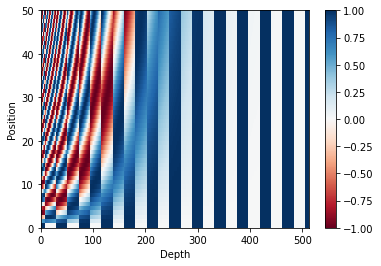

In [3]:
sample_pos_encoding = PositionalEncoding(50,512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

## 9-5. 어텐션? 어텐션!

트랜스포머의 인코더와 디코더에서 사용하고 있는 개념인 어텐션에 대해서 알아보겠습니다!

### 어텐션이란?
---

어텐션 메커니즘을 그림으로 표현한다면 아래와 같이 표현할 수 있습니다.

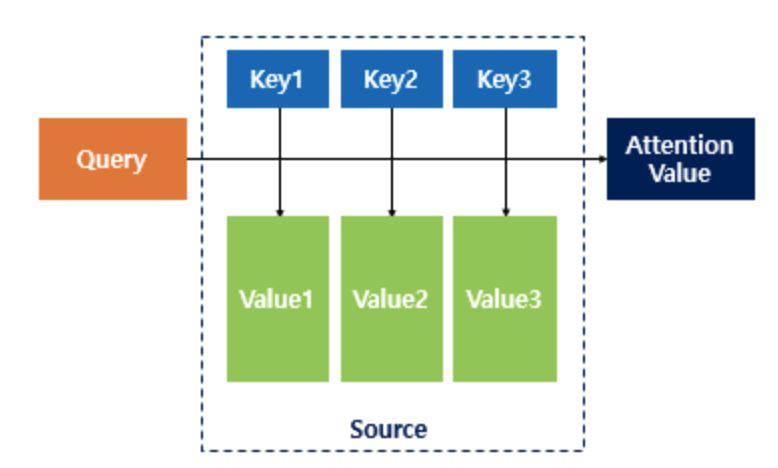

어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 키(Key)와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.

### 트랜스포머에서 사용된 어텐션
---
트랜스포머는 총 세 가지의 어텐션을 사용합니다.

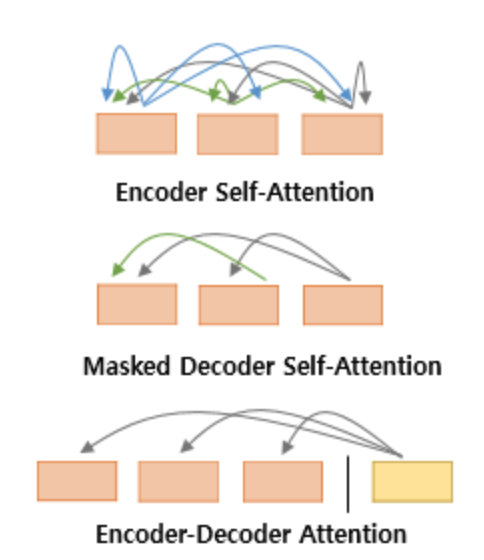

첫 번째 그림인 인코더 셀프 어텐션은 인코더에서 이루어지고,

두 번째 그림인 디코더 셀프 어텐션은 디코더에서 이루어지며,

세 번째 그림인 인코더-디코더 어텐션 또한 디코더에서 이루어집니다.

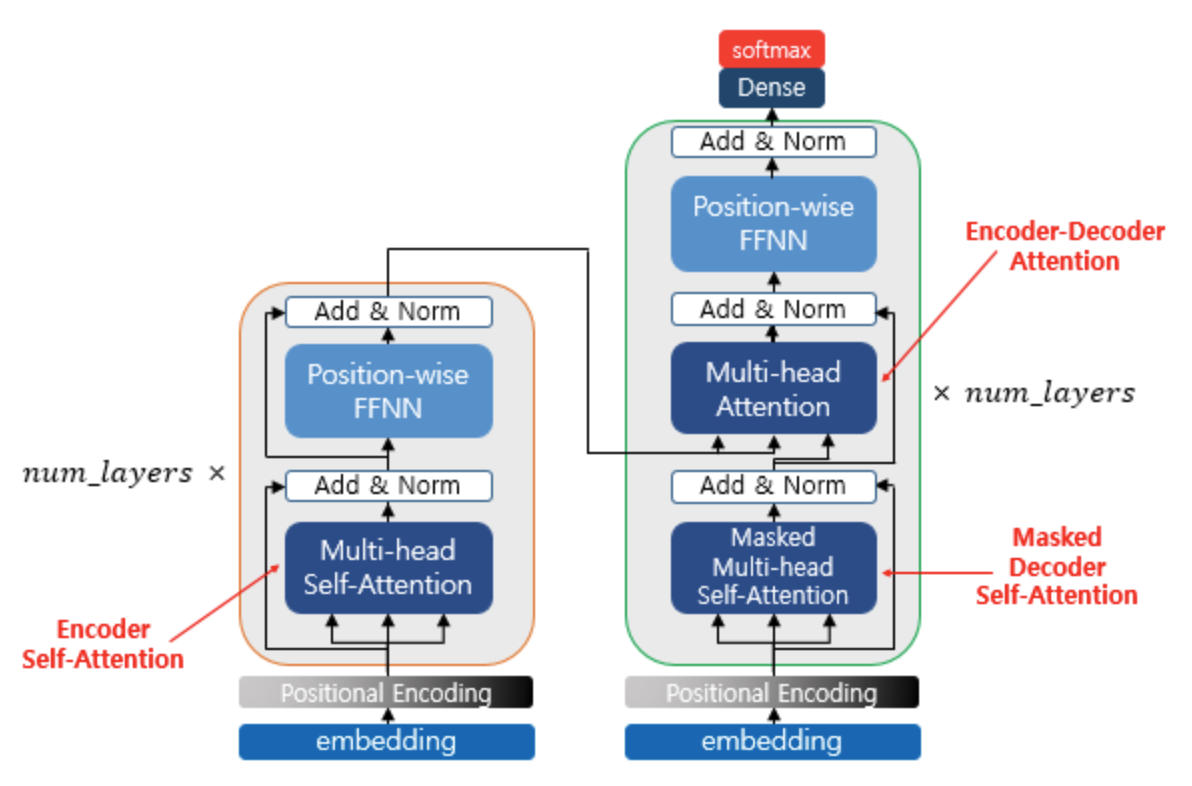

위 그림은 트랜스포머의 전체적인 아키텍처에서 각 어텐션이 위치한 곳을 보여줍니다.

트랜스포머의 어텐션 함수에 사용되는 쿼리(Query), 키(Key), 밸류(Value) 는 기본적으로 '단어 (정보를 함축한) 벡터' 입니다.

단, 여기서 '단어 벡터' 란 초기 입력으로 사용되었던 임베딩 벡터가 아니고, 트랜스포머의 여러 연산을 거친 후의 단어 벡터 입니다.

그럼 위 세 가지 어텐션이 하는 일을 조금 더 자세히 알아보겠습니다.

- 인코더 셀프 어텐션 : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구한다.
- 디코더 셀프 어텐션 : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구한다.
- 인코더-디코더 어텐션 : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구한다.

무려 세 가지 어텐션 중 두 가지가 셀프 어텐션인데요.

자, 그럼 대체 셀프 어텐션이 어떤 의미를 가지고 있으며 트랜스포머에서 왜 중요한지 이해해 볼까요?

### 셀프 어텐션(Self Attention)
---
셀프 어텐션이란 유사도를 구하는 대상이 다른 문장의 단어가 아니라 현재 문장 내의 단어들이 서로 유사도를 구하는 경우를 말합니다. 가령, 위에서 언급한 인코더-디코더 어텐션은 서로 다른 단어 목록(인코더 내 단어와 디코더 내 단어) 사이에서 유사도를 구하기에 셀프 어텐션이 아닙니다.

위의 그림은 구글 AI 블로그 포스트에서 가져왔습니다. 위의 예시 문장을 번역하면 '그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.' 라는 의미가 됩니다. 그런데 여기서 그것(it) 에 해당하는 것은 과연 길(street) 일까요? 동물(animal) 일까요?

우리는 동물이라는 것을 쉽게 알 수 있지만, 기계는 그렇지 않습니다. 하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하여 그것(it) 이 동물(animal) 과 연관되었을 확률이 높다는 것을 찾아냅니다. 그런데 한 가지 의문이 듭니다. 유사도는 어떻게 구할까요?

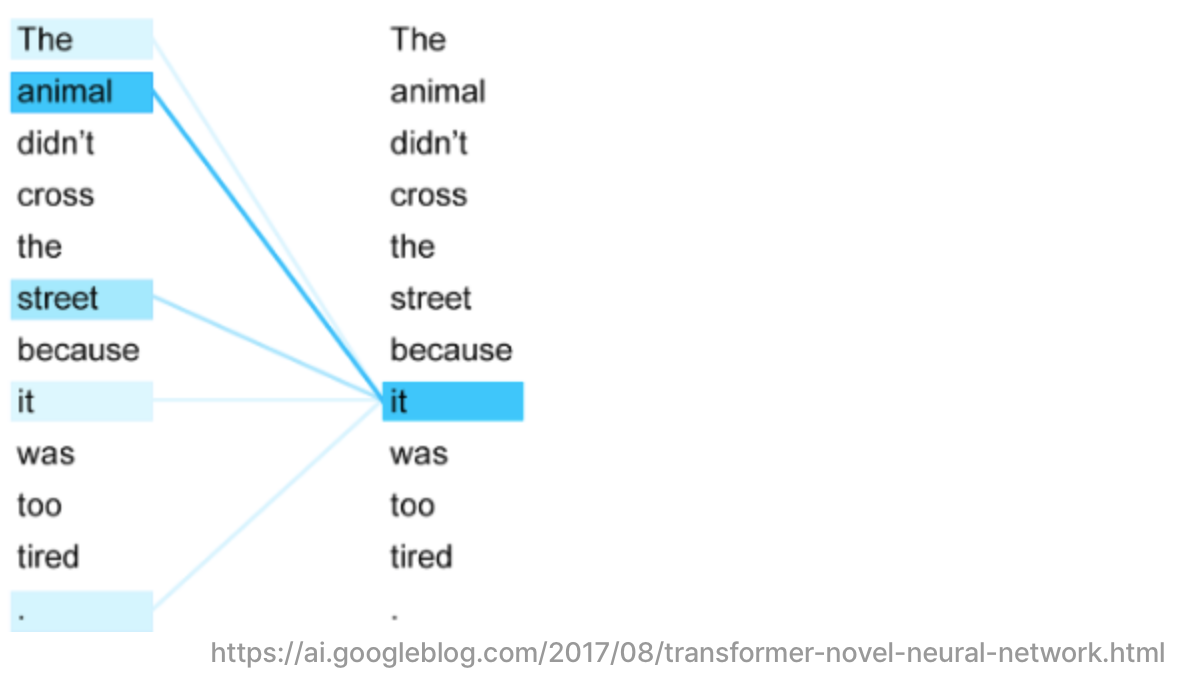



## 9-6. 스케일드 닷 프로덕트 어텐션

앞서 어텐션이 단어들 간의 유사도를 구하는 메커니즘이라고 했었죠?

그렇다면 유사도를 구하는 방법이 있을 겁니다.

트랜스포머에서는 어텐션 값을 구하는 방법으로 아래와 같은 수식을 사용했습니다.

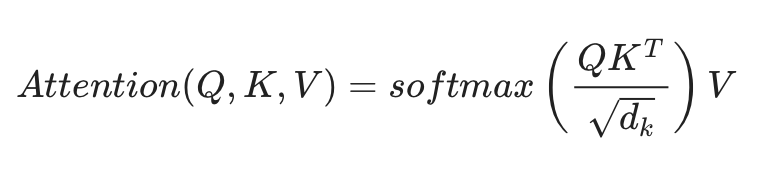

Q, 
K
K, 
V
V는 각각 쿼리(Query), 키(Key), 값(Value)를 나타냅니다.

앞서 언급했던 어텐션 함수의 정의와 결괏값을 다시 상기해봅시다.

어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.

위 정의와 아래 내용 세 가지만 기억하면 수식을 그림으로 정리할 수 있습니다.

1. Q, K, V는 단어 벡터를 행으로 하는 문장 행렬이다.
2. 벡터의 내적(dot product) 은 벡터의 유사도를 의미한다.
3. 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링(Scaling)을 위함이다.

---

우선 Q와 K의 전치 행렬을 곱하는 것을 그림으로 표현하면 다음과 같습니다.

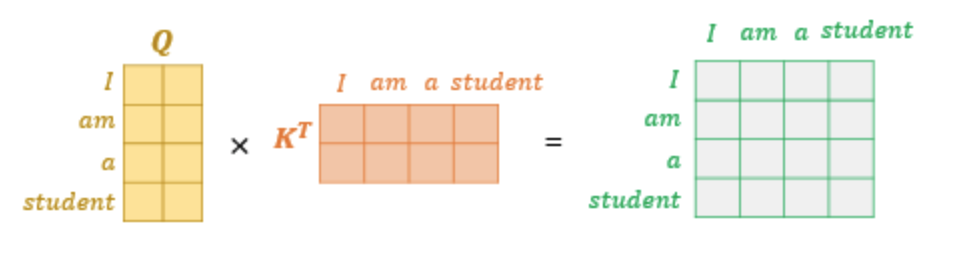

문장 행렬 Q와 문장 행렬 K를 곱하면 위의 그림과 같은 초록색 행렬을 얻을 수 있습니다.

위 초록색 행렬이 의미하는 값은 무엇일까요? 예를 들어 'am' 행과 'student' 열의 값은 Q 행렬에 있던 'am' 벡터와 K 행렬에 있던 'student 벡터'의 내적값을 의미합니다. 결국 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬이 되는 것이지요!

---

이 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고, 유사도를 0과 1사이의 값으로 Normalize해주기 위해서 소프트맥스 함수를 사용합니다. 여기까지가 Q와 K의 유사도를 구하는 과정이라고 볼 수 있겠습니다. 여기에 문장 행렬 V와 곱하면 어텐션 값(Attention Value) 를 얻습니다.

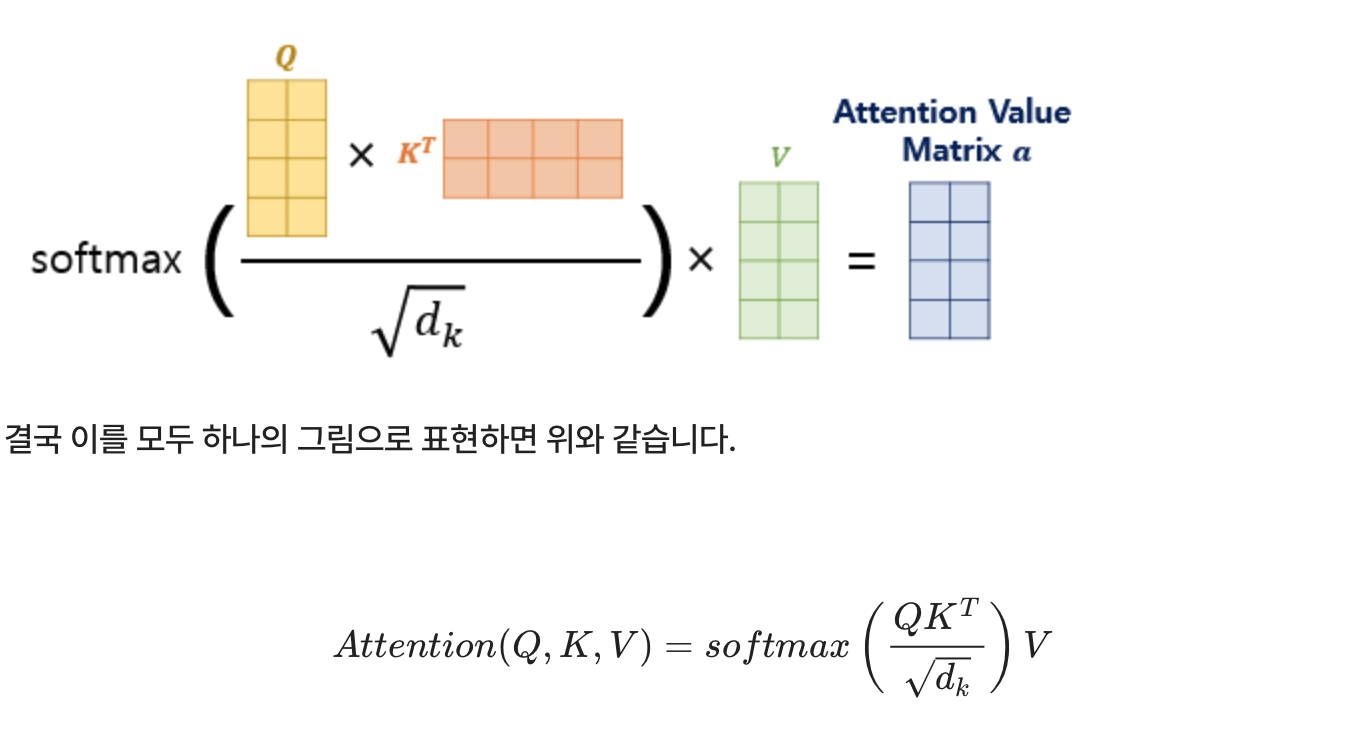

이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식으로 Q와 K의 유사도를 구하였다고 하여 스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention) 이라고 합니다. 유사도를 구하는 방법이 스케일드 닷 프로덕트(scaled dot product)였기 때문에 이런 이름이 붙은 것이지요.

만약에 분모에 특정 값을 나눠주는 부분을 사용하지 않았다면 어텐션의 이름은 무엇일까요? 그 어텐션은 당연히 닷 프로덕트 어텐션(dot product attention) 이라고 부릅니다.

### 구현하기
---
스케일드 닷 프로덕트 어텐션 함수를 구현해봅시다.


In [4]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


## 9-7. 머리가 여러 개인 어텐션

그리스 로마 신화에 등장하는 히드라라는 괴물을 아시나요? 머리가 여러 개인 이 괴물은 여러 곳으로 동시에 시선을 둘 수 있었기 때문에 시선의 사각지대가 없어서 처치하기 어려운 괴물입니다. 결국 헤라클레스라는 영웅이 히드라의 머리를 하나씩 제거한 뒤에야 무찌를 수 있었는데요.

뜬금없이 갑자기 왜 히드라 얘기냐구요? 다른 비유를 하나 들어볼게요. 굉장히 어려운 문제가 가득한 시험지를 받았을 때 '혼자가 아니라 옆에서 누군가 같이 풀어준다면 좀 더 좋은 성적을 받을 텐데'하고 누구나 한 번쯤 상상해보았을 겁니다.

이런 이야기는 현실에서는 상상에 불과하지만, 기계가 할 수 있도록 해줄 수는 있습니다.

### 병렬로 어텐션 수행하기
---
트랜스포머에서 num_heads라는 변수는 기계가 몇 개의 똑똑한 머리를 사용할지, 다시 말해 병렬적으로 몇 개의 어텐션 연산을 수행할지를 결정하는 하이퍼파라미터입니다.

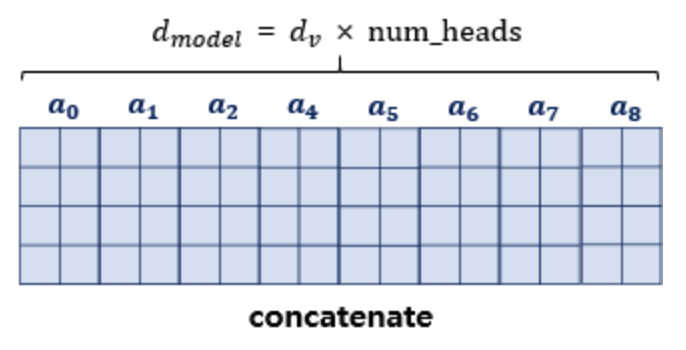

앞서 포지셔널 인코딩에서 d_model은 임베딩 벡터의 차원이라고 언급한 바 있습니다. 결국 트랜스포머의 초기 입력인 문장 행렬의 크기는 문장의 길이를 행으로, d_model을 열의 크기로 가집니다.

트랜스포머는 이렇게 입력된 문장 행렬을 num_heads의 수만큼 쪼개서 어텐션을 수행하고, 이렇게 얻은 num_heads의 개수만큼의 어텐션 값 행렬을 다시 하나로 concatenate합니다.

위의 그림은 num_heads가 8개인 경우인데, 다시 concatenate하면서 열의 크기가 d_model이 됩니다.

각자 문제지를 나눠서 푼 후에 마지막에 다시 결과를 합친다고 비유해볼 수도 있겠네요!

### 멀티-헤드 어텐션
---
이렇게 병렬로 어텐션을 수행하면 얻을 수 있는 효과는 무엇일까요?

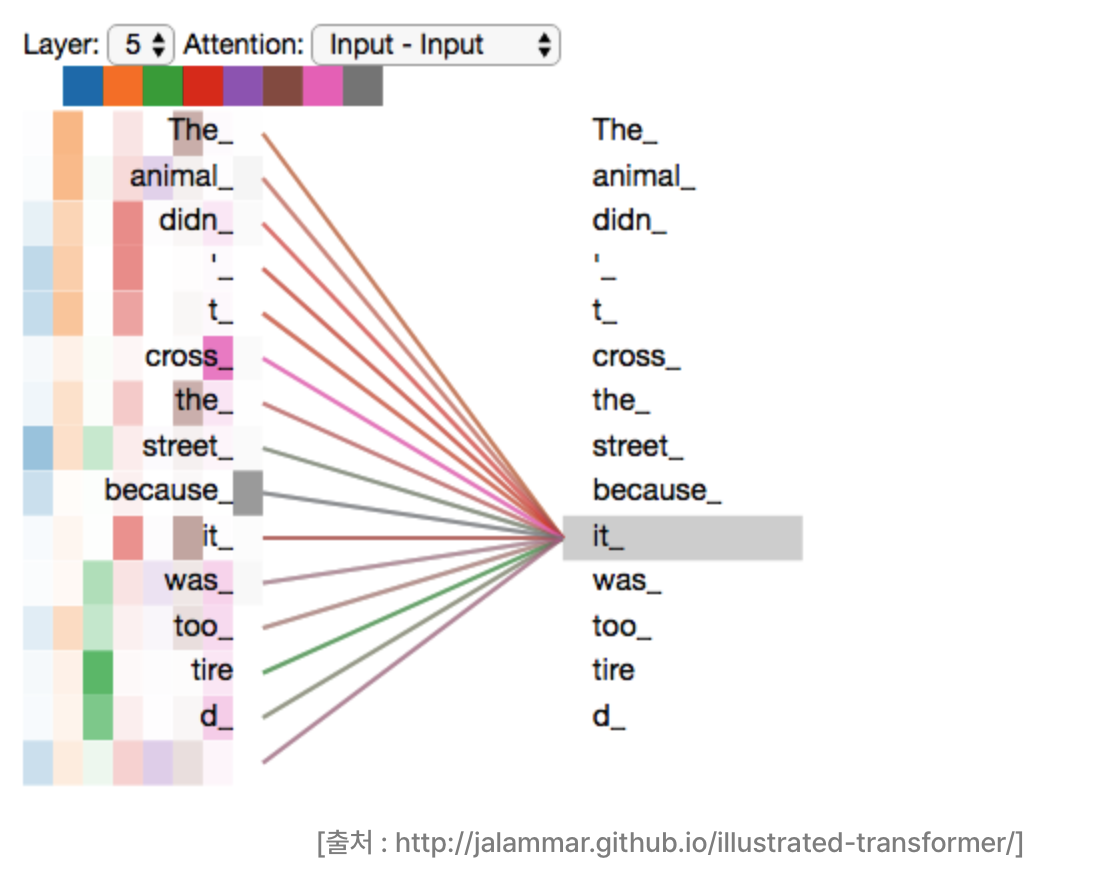

위 그림은 num_heads의 값이 8일 때, 병렬로 수행되는 어텐션이 서로 다른 셀프 어텐션 결과를 얻을 수 있음을 보여줍니다. 다시 말해 8개의 머리는 각각 다른 관점에서 어텐션을 수행하므로 한 번의 어텐션만 수행했다면 놓칠 수도 있던 정보를 캐치할 수 있습니다. 예를 들어 위 그림에서라면 it_이라는 토큰이 animal_과 유사하다고 보는 관점과 street_과 유사하다고 보는 관점이 한꺼번에 모두 표현 가능하다는 뜻입니다.

이와 같이 어텐션을 병렬로 수행하는 것을 멀티 헤드 어텐션이라고 부릅니다.

### 구현하기
---
멀티 헤드 어텐션을 구현하면 다음과 같습니다.

내부적으로는 스케일드 닷 프로덕트 어텐션 함수를 호출합니다.

In [6]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3
